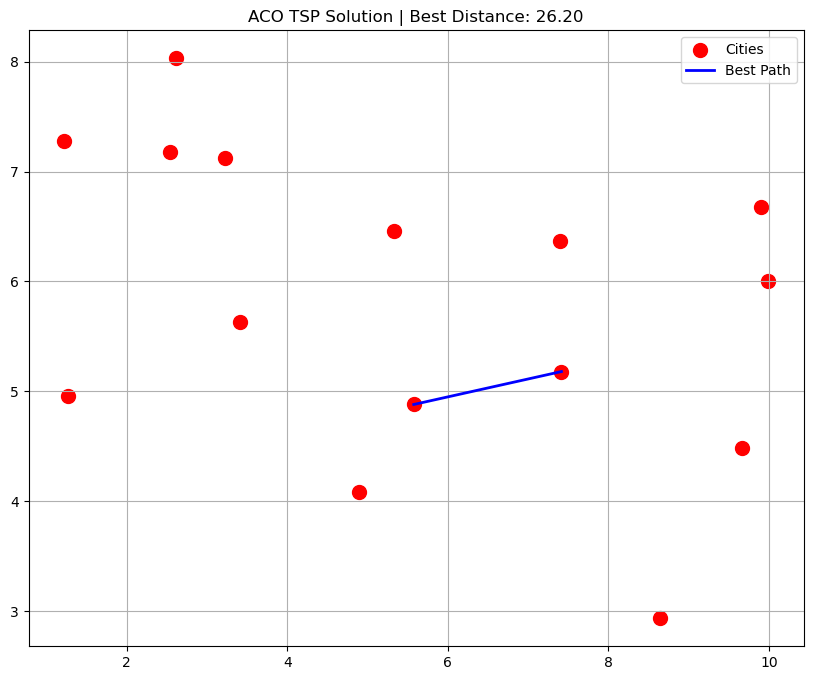

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
NUM_ANTS = 20
NUM_ITERATIONS = 100
EVAPORATION_RATE = 0.5
ALPHA = 1.0  # Pheromone importance
BETA = 2.0   # Distance importance

# Cities (randomly placed)
NUM_CITIES = 15
cities = np.random.rand(NUM_CITIES, 2) * 10

# Distance matrix
distances = np.zeros((NUM_CITIES, NUM_CITIES))
for i in range(NUM_CITIES):
    for j in range(NUM_CITIES):
        distances[i][j] = np.linalg.norm(cities[i] - cities[j])

# Pheromone matrix
pheromones = np.ones((NUM_CITIES, NUM_CITIES))

# Store best path
best_path = None
best_distance = float('inf')

# ACO Algorithm
for iteration in range(NUM_ITERATIONS):
    paths = []
    path_distances = []
    
    for ant in range(NUM_ANTS):
        visited = [np.random.randint(NUM_CITIES)]  # Start at random city
        current_city = visited[0]
        
        while len(visited) < NUM_CITIES:
            unvisited = [c for c in range(NUM_CITIES) if c not in visited]
            probabilities = []
            
            for city in unvisited:
                pheromone = pheromones[current_city][city] ** ALPHA
                visibility = (1.0 / distances[current_city][city]) ** BETA
                probabilities.append(pheromone * visibility)
            
            probabilities = np.array(probabilities)
            probabilities /= probabilities.sum()
            
            next_city = np.random.choice(unvisited, p=probabilities)
            visited.append(next_city)
            current_city = next_city
        
        # Add return to start city
        visited.append(visited[0])
        path_distance = sum(distances[visited[i]][visited[i+1]] for i in range(NUM_CITIES))
        
        paths.append(visited)
        path_distances.append(path_distance)
        
        if path_distance < best_distance:
            best_distance = path_distance
            best_path = visited
    
    # Update pheromones
    pheromones *= (1 - EVAPORATION_RATE)  # Evaporation
    
    for path, distance in zip(paths, path_distances):
        for i in range(NUM_CITIES):
            pheromones[path[i]][path[i+1]] += 1.0 / distance

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title(f"ACO TSP Solution | Best Distance: {best_distance:.2f}")
ax.scatter(cities[:, 0], cities[:, 1], c='red', s=100, label='Cities')
line, = ax.plot([], [], 'b-', lw=2, label='Best Path')

def update(frame):
    if frame < len(best_path)-1:
        x = [cities[best_path[frame]][0], cities[best_path[frame+1]][0]]
        y = [cities[best_path[frame]][1], cities[best_path[frame+1]][1]]
        line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=len(best_path), interval=200, blit=True)
ani.save("aco_tsp.gif", writer=PillowWriter(fps=10))
plt.legend()
plt.grid(True)
plt.show()